## Import modules

In [1]:
from common_dirs_fns import *
from ngs_functions import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from collections import Counter

C:\ProgramData\Anaconda3\lib\site-packages\tqdm\std.py:648: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
# Specify matplotlib formatting
%matplotlib inline
mpl.rcParams['svg.fonttype'] ='none'
mpl.rcParams['font.sans-serif'] = 'Arial'
mpl.rcParams['axes.linewidth'] = 1.
mpl.rcParams['mathtext.default'] = 'regular'
plt.rcParams.update({'font.size': 10})

## Combine and count paired-end reads

In [3]:
# Directory to save FLASH output
flash_out = ngs_path + 'flash_out_sort-seq'

# Forward and reverse reads to combine with FLASH
flash_in1 = ngs_path + 'sort-seq_library_R1.fastq'
flash_in2 = ngs_path + 'sort-seq_library_R2.fastq'

In [4]:
# Generate a dataframe that counts all of the unique paired-end reads
# Warning: FLASH takes a while to run. The following block took ~ 24 minutes to execute for ~ 13.9 million reads.
merged_reads_df = count_paired_end_reads(flash_in1, flash_in2, flash_out)

"FLASH-1.2.11-windows-bin/flash"  --max-overlap=150 --min-overlap=10 --output-directory=NGS/flash_out_sort-seq --max-mismatch-density=0.1 "NGS/sort-seq_library_R1.fastq" "NGS/sort-seq_library_R2.fastq"
>>> [FLASH] Starting FLASH v1.2.11
>>> [FLASH] Fast Length Adjustment of SHort reads
>>> [FLASH]
>>> [FLASH] Input files:
>>> [FLASH]     NGS/sort-seq_library_R1.fastq
>>> [FLASH]     NGS/sort-seq_library_R2.fastq
>>> [FLASH]
>>> [FLASH] Output files:
>>> [FLASH]     NGS/flash_out_sort-seq/out.extendedFrags.fastq
>>> [FLASH]     NGS/flash_out_sort-seq/out.notCombined_1.fastq
>>> [FLASH]     NGS/flash_out_sort-seq/out.notCombined_2.fastq
>>> [FLASH]     NGS/flash_out_sort-seq/out.hist
>>> [FLASH]     NGS/flash_out_sort-seq/out.histogram
>>> [FLASH]
>>> [FLASH] Parameters:
>>> [FLASH]     Min overlap:           10
>>> [FLASH]     Max overlap:           150
>>> [FLASH]     Max mismatch density:  0.100000
>>> [FLASH]     Allow "outie" pairs:   false
>>> [FLASH]     Cap mismatch quals:    fal

>>> [FLASH] Processed 4250000 read pairs
>>> [FLASH] Processed 4275000 read pairs
>>> [FLASH] Processed 4300000 read pairs
>>> [FLASH] Processed 4325000 read pairs
>>> [FLASH] Processed 4350000 read pairs
>>> [FLASH] Processed 4375000 read pairs
>>> [FLASH] Processed 4400000 read pairs
>>> [FLASH] Processed 4425000 read pairs
>>> [FLASH] Processed 4450000 read pairs
>>> [FLASH] Processed 4475000 read pairs
>>> [FLASH] Processed 4500000 read pairs
>>> [FLASH] Processed 4525000 read pairs
>>> [FLASH] Processed 4550000 read pairs
>>> [FLASH] Processed 4575000 read pairs
>>> [FLASH] Processed 4600000 read pairs
>>> [FLASH] Processed 4625000 read pairs
>>> [FLASH] Processed 4650000 read pairs
>>> [FLASH] Processed 4675000 read pairs
>>> [FLASH] Processed 4700000 read pairs
>>> [FLASH] Processed 4725000 read pairs
>>> [FLASH] Processed 4750000 read pairs
>>> [FLASH] Processed 4775000 read pairs
>>> [FLASH] Processed 4800000 read pairs
>>> [FLASH] Processed 4825000 read pairs
>>> [FLASH] Proc

>>> [FLASH] Processed 9225000 read pairs
>>> [FLASH] Processed 9250000 read pairs
>>> [FLASH] Processed 9275000 read pairs
>>> [FLASH] Processed 9300000 read pairs
>>> [FLASH] Processed 9325000 read pairs
>>> [FLASH] Processed 9350000 read pairs
>>> [FLASH] Processed 9375000 read pairs
>>> [FLASH] Processed 9400000 read pairs
>>> [FLASH] Processed 9425000 read pairs
>>> [FLASH] Processed 9450000 read pairs
>>> [FLASH] Processed 9475000 read pairs
>>> [FLASH] Processed 9500000 read pairs
>>> [FLASH] Processed 9525000 read pairs
>>> [FLASH] Processed 9550000 read pairs
>>> [FLASH] Processed 9575000 read pairs
>>> [FLASH] Processed 9600000 read pairs
>>> [FLASH] Processed 9625000 read pairs
>>> [FLASH] Processed 9650000 read pairs
>>> [FLASH] Processed 9675000 read pairs
>>> [FLASH] Processed 9700000 read pairs
>>> [FLASH] Processed 9725000 read pairs
>>> [FLASH] Processed 9750000 read pairs
>>> [FLASH] Processed 9775000 read pairs
>>> [FLASH] Processed 9800000 read pairs
>>> [FLASH] Proc

>>> [FLASH] 850.419 seconds elapsed
Writing sequences file
0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000
2400000
2500000
2600000
2700000
2800000
2900000
3000000
3100000
3200000
3300000
3400000
3500000
3600000
3700000
3800000
3900000
4000000
4100000
4200000
4300000
4400000
4500000
4600000
4700000
4800000
4900000
5000000
5100000
5200000
5300000
5400000
5500000
5600000
5700000
5800000
5900000
6000000
6100000
6200000
6300000
6400000
6500000
6600000
6700000
6800000
6900000
7000000
7100000
7200000
7300000
7400000
7500000
7600000
7700000
7800000
7900000
8000000
8100000
8200000
8300000
8400000
8500000
8600000
8700000
8800000
8900000
9000000
9100000
9200000
9300000
9400000
9500000
9600000
9700000
9800000
9900000
10000000
10100000
10200000
10300000
10400000
10500000
10600000
10700000
10800000
10900000
11000000
11100000
11200000
11300000
11400000
11500000
11600000
117

In [5]:
# Save merged_reads_df to a csv file
merged_reads_df.to_csv(analysis_path + 'merged_reads_df.csv')

## Manually specify sequence information for read processing

In [6]:
# Forward and reverse primer binding sites
fwd_primer = 'ttcggcatggggtcaggtg'.upper()
rev_primer = 'agctgcgggtatcggagga'.upper()

# Names of forward and reverse primers used to amplify each bin
bin_primers = pd.DataFrame.from_dict({'Bin 1':['KB649','KB659'],
                'Bin 2':['KB642','KB652'],
                'Bin 3':['KB650','KB660'],
                'Bin 4':['KB644','KB654'],
                'Bin 5':['KB645','KB655'],
                'Bin 6':['KB646','KB656'],
                'Bin 7':['KB647','KB657'],
                'Bin 8':['KB648','KB658'],
                'FSC-BSC':['KB651','KB661']}, # Sample with no fluorescence gating
                orient='index',columns=['PrimerF','PrimerR'])
bin_primers.index.name = 'Bin'

# 10 nt barcodes associated with each primer
bin_primer_barcodes = {# forward primers
                      'KB642':'CGCTCAGTTC',
                      'KB643':'TATCTGACCT',
                      'KB644':'ATATGAGACG',
                      'KB645':'CTTATGGAAT',
                      'KB646':'TAATCTCGTC',
                      'KB647':'GCGCGATGTT',
                      'KB648':'AGAGCACTAG',
                      'KB649':'TGCCTTGATC',
                      'KB650':'CTACTCAGTC',
                      'KB651':'TCGTCTGACT',
                      # reverse primers: same barcodes as fwd primers,
                      #                  numbering offset by 10
                      'KB652':'CGCTCAGTTC',
                      'KB653':'TATCTGACCT',
                      'KB654':'ATATGAGACG',
                      'KB655':'CTTATGGAAT',
                      'KB656':'TAATCTCGTC',
                      'KB657':'GCGCGATGTT',
                      'KB658':'AGAGCACTAG',
                      'KB659':'TGCCTTGATC',
                      'KB660':'CTACTCAGTC',
                      'KB661':'TCGTCTGACT',}
    
bin_primers['BarcodeF'] = bin_primers['PrimerF'].apply(lambda x: bin_primer_barcodes[x])
bin_primers['BarcodeR'] = bin_primers['PrimerR'].apply(lambda x: bin_primer_barcodes[x])

In [7]:
# Make barcode regexes that can be reused so that they do not have to be
# recompiled at every iteration
barcode_lookup_table = bin_primers.reset_index().set_index('BarcodeF')
barcode_mismatches = 2 # Maximum number of mismatches allowed in the barcode region, 
               # all barcodes used are unique within 2 errors ({e<=2})
barcode_regexes = {}
for barcode in barcode_lookup_table.index:
    # \A indicates that the matching sequence should be found at the beginning of the string
    barcode_regex = regex.compile('(\A)('+barcode+'){e<='+str(barcode_mismatches)+'}')
    barcode_regexes[barcode] = barcode_regex

In [8]:
# Up to two errors are allowed in the primer binding site
primer_mismatches = 2

'''
Searching for rev_primer_regex will return the sequence that occurs after the primer binding site
See Python re documentation (https://docs.python.org/3/library/re.html) for reference to (?<=...) notation
ACA = first three nucleotides after primer binding site in all library constructs
'''
rev_primer_regex = regex.compile('(?<=('+rev_primer+'){e<='+str(primer_mismatches)+'}ACA)')

## Process reads

In [9]:
new_cols = ['MergedRC',
            'BinF','BinF_Mismatches','BinR','BinR_Mismatches','Bin',
            'AfterRevPrimerF','AfterRevPrimerR','AfterRevPrimer',
            'TlnRaw','Translation','Completed']

merged_reads_df[new_cols] = pd.DataFrame([[None]*len(new_cols)], index=merged_reads_df.index)

In [10]:
def process_data(seq):
    # Reverse complement
    rc = str(Seq(seq).reverse_complement())
    
    # Assign a bin
    binf, binf_mismatches = assign_barcode(seq, barcode_lookup_table, barcode_regexes)
    binr, binr_mismatches = assign_barcode(rc, barcode_lookup_table, barcode_regexes)
    cbin = consensus_bin(binf, binr)
    
    # Find DNA sequence that encodes peptide
    after_rev_f = find_after_rev_primer(seq, rev_primer_regex)
    after_rev_r = find_after_rev_primer(rc, rev_primer_regex)
    after_rev = consensus_after_rev_primer(after_rev_f,after_rev_r)
    
    # Translate DNA sequence
    raw_tln = raw_translation(after_rev)
    tln = actual_translation(raw_tln)
    
    completed = True # For troubleshooting runtime and memory errors
    
    return [rc,
            binf, binf_mismatches, binr, binr_mismatches, cbin,
            after_rev_f,after_rev_r,after_rev,
            raw_tln, tln,
            completed]

In [11]:
# This takes approximately 35 minutes to run
merged_reads_df.loc[:,new_cols] = merged_reads_df.loc[:].progress_apply(lambda x: process_data(x['Merged']),
                                                                          axis=1, result_type='expand').values

C:\ProgramData\Anaconda3\lib\site-packages\Bio\Seq.py:2715: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning)


In [14]:
# Save merged_reads_df to a csv file
merged_reads_df.to_csv(analysis_path + 'merged_reads_df.csv')

## Analyze amplicon length distribution

In [15]:
# Calculate the length of each read in merged_reads_df
merged_reads_df['ReadLength'] = merged_reads_df['Merged'].apply(lambda x: len(x))

In [16]:
# Generate a pandas Series representing a histogram of read lengths
read_length_hist = pd.crosstab(merged_reads_df['ReadLength'],'',values=merged_reads_df['Count'],aggfunc='sum')

# Reindex to include any missing lengths (not strictly necessary here because there are sequences
# at every intermediate length, but included for future proofing)
read_length_hist = read_length_hist.reindex(np.arange(read_length_hist.index.min(),read_length_hist.index.max()))
read_length_hist[read_length_hist.isnull()] = 0

In [17]:
expected_amplicon_length = 425

print('\t'.join(['Number of reads with the expected amplicon length ('+str(expected_amplicon_length)+' nt):\t',
      str(read_length_hist.loc[expected_amplicon_length]),'\t',
      '{:.2%}'.format(read_length_hist.loc[425]/read_length_hist.sum())]))

print('\t\t'.join(['Number of reads within 10% of the expected amplicon length:',
      str(read_length_hist.loc[np.ceil(expected_amplicon_length*0.9):np.floor(expected_amplicon_length*1.1)].sum()),
      '{:.2%}'.format(read_length_hist.loc[np.ceil(expected_amplicon_length*0.9):np.floor(expected_amplicon_length*1.1)].sum()/read_length_hist.sum())]))

Number of reads with the expected amplicon length (425 nt):		3936308			29.86%
Number of reads within 10% of the expected amplicon length:		11764366		89.25%


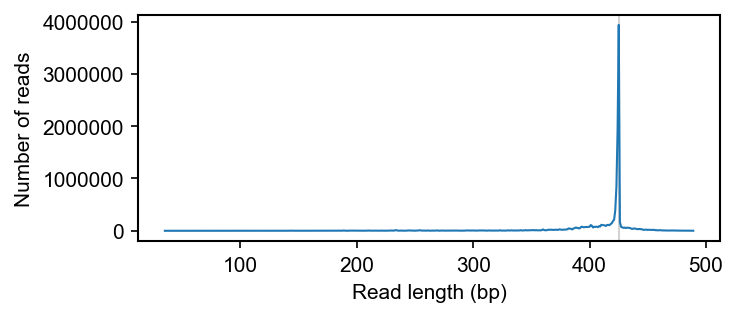

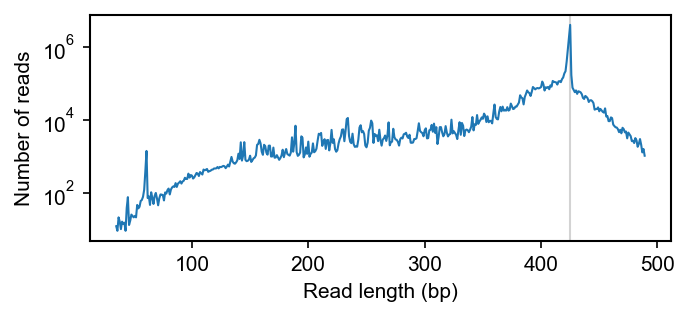

In [18]:
for scale in ['linear', 'log']:
    fig = plt.figure(figsize=(5.,2.), dpi=150)
    plt.plot(read_length_hist, linewidth=1)
    # This vertical line represents the expected amplicon length based on the library design
    plt.axvline(expected_amplicon_length, color='lightgrey', zorder=-1, linewidth=1)
    plt.xlabel('Read length (bp)')
    plt.ylabel('Number of reads')
    plt.yscale(scale)
    plt.savefig(figures_path + 'read_length_hist_' + scale + '.png', dpi=300, bbox_inches='tight')

In [19]:
# Calculate some basic statistics about the bin assignment and translation processes
# All of these numbers are given in terms of number of reads ('Count') and not
# in terms of unique DNA sequences, which is calculated later on in the notebook

total_reads = merged_reads_df['Count'].sum()

print('\t\t'.join(['Number of reads that were not assigned to a fluorescence bin:',
      str(merged_reads_df[merged_reads_df['Bin'].isnull()]['Count'].sum()),
      '{:.2%}'.format(merged_reads_df[merged_reads_df['Bin'].isnull()]['Count'].sum()/total_reads)]))

print('\t\t'.join(['Number of reads containing no primer binding site sequence:',
      str(merged_reads_df[merged_reads_df['AfterRevPrimer'].isnull()]['Count'].sum()),
      '{:.2%}'.format(merged_reads_df[merged_reads_df['AfterRevPrimer'].isnull()]['Count'].sum()/total_reads)]))

print('\t\t'.join(['Total number of reads with incomplete information:\t',
      str(merged_reads_df[(merged_reads_df['AfterRevPrimer'].isnull())|(merged_reads_df['Bin'].isnull())]['Count'].sum()),
      '{:.2%}'.format(merged_reads_df[(merged_reads_df['AfterRevPrimer'].isnull())|(merged_reads_df['Bin'].isnull())]['Count'].sum()/total_reads)]))

Number of reads that were not assigned to a fluorescence bin:		1265424		9.60%
Number of reads containing no primer binding site sequence:		198440		1.51%
Total number of reads with incomplete information:			1434899		10.89%


## Consolidate DNA sequence counts into peptide counts

### Create and format a new dataframe for peptide counts
The crosstab function in pandas generates a dataframe where the index is peptide sequences, the columns are different fluorescence bins, and the values are the total number of reads in each bin corresponding to each peptide sequence. This reduces the length of merged_reads_df by consolidating reads with different DNA sequences that ultimately encoded the same peptide. This consolidation also reduces the run time for assigning names to human AMP-encoding reads (see assign_peptide_from_library below).

In [20]:
tln_count_df = pd.crosstab(merged_reads_df['Translation'],
                           merged_reads_df['Bin'],
                           values=merged_reads_df['Count'],
                           aggfunc=sum)

In [21]:
# The total sum of the counts in tln_count_df will be less than that in merged_reads_df because
# tln_count_df doesn't contain reads with no bin assignment

print('Number of unique DNA sequences in merged_reads_df:','\t'*5,len(merged_reads_df))
print('Number of unique DNA sequences with bin assignments and translation information:\t',
      len(merged_reads_df[~(merged_reads_df['Translation'].isnull())]))

# This does not include sequences that encode no peptide, either because they contain only
# a stop codon ('*') or because they do not contain a stop codon ('')
print('Number of unique peptides encoded in tln_count_df:','\t'*5,
      len(tln_count_df.loc[~(tln_count_df.index.isin(['','*']))]))

Number of unique DNA sequences in merged_reads_df: 					 2985929
Number of unique DNA sequences with bin assignments and translation information:	 2882023
Number of unique peptides encoded in tln_count_df: 					 173307


In [22]:
# Reformat the columns as a MultiIndex (will be useful for adding Frequency columns later)
tln_count_df.columns = pd.MultiIndex.from_product([['Count'],tln_count_df.columns])

# Crosstab assigns a null value when there are no reads in a translation/bin category
# Convert null values to zero
tln_count_df[tln_count_df.isnull()] = 0

# Crosstab returns floats instead of ints, convert to int because count is an integer number
tln_count_df = tln_count_df.astype(int)

# Reset index to enable processing of peptide sequences with progress_apply
tln_count_df = tln_count_df.reset_index()

### Assign names to peptide sequences from human AMP list (peptides_df)
The human AMP list represents all of the sequences that were designed to exist in the library. Other peptides present in the library arose from mutations in the original primer pool, the cloning process, or next-generation sequencing.

In [23]:
# The index of peptides_df is the APD ID from the Antimicrobial Peptide Database
peptides_df = pd.read_excel(peptides_df_path,index_col=0)

def assign_peptide_from_library(tln_seq):
    if tln_seq in ['*','']: # These are special inputs that indicate no peptide was produced (see actual_translation).
                                 # Thus, there is no need to iterate over the human AMP list for these inputs.
        return tln_seq

    for i, (pep_id, pep_seq) in enumerate(zip(peptides_df.index,peptides_df['Sequence'])):
        if pep_seq == tln_seq:
            return pep_id
    return None

In [24]:
tln_count_df['AssignedPeptide'] = tln_count_df['Translation'].progress_apply(assign_peptide_from_library)

In [25]:
print('\t\t'.join(['Number of unique peptides that do not encode a human AMP:',
      str(len(tln_count_df[tln_count_df['AssignedPeptide'].isnull()]))]))

print('\t\t'.join(['Number of human AMPs (<= 104 aa) represented in the library:',
      str(len(tln_count_df[(~tln_count_df['AssignedPeptide'].isnull())&
                           (~tln_count_df['AssignedPeptide'].isin(['*','']))])), # Removes non-peptide encoding sequences
      '{:.2%}'.format(len(tln_count_df[(~tln_count_df['AssignedPeptide'].isnull())&
                                       (~tln_count_df['AssignedPeptide'].isin(['*','']))])/
                      len(peptides_df[peptides_df['Sequence'].apply(lambda x: len(x))<=104]))]))

print('\t\t'.join(['Number of reads corresponding to non-human AMP peptides:',
      str(tln_count_df.loc[tln_count_df['AssignedPeptide'].isnull(),'Count'].sum().sum()),
      '{:.2%}'.format(tln_count_df.loc[tln_count_df['AssignedPeptide'].isnull(),'Count'].sum().sum()/
                      tln_count_df.loc[:,'Count'].sum().sum())]))

Number of unique peptides that do not encode a human AMP:		173190
Number of human AMPs (<= 104 aa) represented in the library:		117		100.00%
Number of reads corresponding to non-human AMP peptides:		3151778		26.83%


### Calculate the frequency of peptides based on the total number of reads corresponding to each bin

In [26]:
# Calculate frequency data for each peptide in each bin by dividing each entry in the dataframe by the
# total number of reads that were present in the corresponding bin, then append this information to tln_count_df
tln_count_df = tln_count_df.join(
                    tln_count_df[['Count']].div(tln_count_df[['Count']].sum(axis=0)).rename(columns={'Count':'Frequency'}))

In [27]:
tln_count_df = tln_count_df.set_index(['Translation','AssignedPeptide'])

In [28]:
tln_count_df.to_csv(analysis_path+'tln_count_df.csv')